> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：调查数据集（TMDb电影数据）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
print('导入完成')

导入完成


<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [2]:
#获取有空值的列：
def columns_has_nan(df):
    ret = []
    #获取数据集的总行数
    total_rows = df.shape[0]
    #返回有空值的列
    ret = [col for col in df.columns if df[col].count()<total_rows]
    return ret

In [4]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
# print('数据的维度:{}'.format(df.shape))
# print('-'*40)
# print('缺失数据统计:\n{}'.format(df.isnull().sum()))
# print('-'*40)
# print('缺失的列包括:{}'.format(columns_has_nan(df)))
# print('-'*40)
# print('重复的列数:{}'.format(df[df.duplicated()].shape[0]))

```
数据的维度:(10866, 21)
----------------------------------------
缺失数据统计:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
----------------------------------------
缺失的列包括:['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']
----------------------------------------
重复的列数:1

```

##### 由上述统计信息可以看出，整个数据集包括`10866`行，`21`列，有缺失的数据列为:'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies',有重复的数据`1`条
##### 缺失最多的为homepage列，缺失7930条，因为该列表示主页，对于此次统计分析无关联，可以不考虑该列

In [5]:
#选取需要的列，部分列值对这次分析无相关性
movies_data = df.loc[:,['id','popularity','budget','revenue','original_title','cast','director','genres','production_companies','vote_average','budget_adj','revenue_adj','release_year']]
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
genres                  10843 non-null object
production_companies    9836 non-null object
vote_average            10866 non-null float64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [6]:
movies_data.describe()

,id,popularity,budget,revenue,vote_average,budget_adj,revenue_adj,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,1.086600e+04,1.086600e+04,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,5.974922,1.755104e+07,5.136436e+07,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,0.935142,3.430616e+07,1.446325e+08,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,1.500000,0.000000e+00,0.000000e+00,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,5.400000,0.000000e+00,0.000000e+00,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,6.000000,0.000000e+00,0.000000e+00,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,6.600000,2.085325e+07,3.369710e+07,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9.200000,4.250000e+08,2.827124e+09,2015.000000


> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理（空值、重复值、异常值处理。）

In [7]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
##删除为空的行
movies_data.dropna(inplace=True)
#删除重复的行
movies_data.drop_duplicates(inplace=True)
#通过上述分析，发现popularity的值可能有异常
popularity_Q1 = movies_data['popularity'].quantile(0.25)
popularity_Q3 = movies_data['popularity'].quantile(0.75)
popularity_IQR = popularity_Q3-popularity_Q1
outlier_step = popularity_IQR*1.5
movies_data.query('popularity > @popularity_Q1 - @outlier_step and popularity < @popularity_Q3 + @outlier_step',inplace=True)
movies_data.describe()

,id,popularity,budget,revenue,vote_average,budget_adj,revenue_adj,release_year
count,8928.000000,8928.000000,8.928000e+03,8.928000e+03,8928.000000,8.928000e+03,8.928000e+03,8928.000000
mean,62644.526322,0.474667,1.132612e+07,2.299155e+07,5.901960,1.428549e+07,3.218216e+07,2000.515905
std,90241.453442,0.344941,2.266976e+07,5.949262e+07,0.900974,2.717413e+07,8.317467e+07,13.133594
min,5.000000,0.000188,0.000000e+00,0.000000e+00,1.500000,0.000000e+00,0.000000e+00,1960.000000
25%,10548.750000,0.218221,0.000000e+00,0.000000e+00,5.300000,0.000000e+00,0.000000e+00,1993.000000
50%,18892.500000,0.383084,0.000000e+00,0.000000e+00,6.000000,0.000000e+00,0.000000e+00,2005.000000
75%,65064.250000,0.640441,1.400000e+07,1.783700e+07,6.500000,1.824449e+07,2.540808e+07,2011.000000
max,417859.000000,1.591827,4.250000e+08,1.123747e+09,8.700000,4.250000e+08,1.583050e+09,2015.000000


In [8]:
#查看整理后的数据
movies_data.head()

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,budget_adj,revenue_adj,release_year
104,188222,1.532997,30000000,49263404,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,Doug Ellin,Comedy,Warner Bros.|Closest to the Hole Productions,6.2,2.759999e+07,4.532231e+07,2015
105,252838,1.510096,23000000,79799880,The Wedding Ringer,Kevin Hart|Josh Gad|Kaley Cuoco|Affion Crocket...,Jeremy Garelick,Comedy,Miramax Films|Screen Gems|LStar Capital,6.5,2.115999e+07,7.341586e+07,2015
106,273477,1.499614,15000000,14860766,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,Christopher B. Landon,Comedy|Horror,Paramount Pictures|Oops Doughnuts Productions|...,6.2,1.379999e+07,1.367190e+07,2015
107,298312,1.495112,5000000,98450062,The Visit,Olivia DeJonge|Ed Oxenbould|Kathryn Hahn|Benja...,M. Night Shyamalan,Horror|Thriller,Blumhouse Productions|Blinding Edge Pictures,5.9,4.599998e+06,9.057402e+07,2015
108,261023,1.483246,53000000,99775678,Black Mass,Johnny Depp|Joel Edgerton|Benedict Cumberbatch...,Scott Cooper,Crime|Drama,Infinitum Nihil|Head Gear Films|Cross Creek Pi...,6.3,4.875998e+07,9.179358e+07,2015


<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（vote_average top 500的电影，最受欢迎的电影类型）

In [9]:
# 用这个代码框和其它代码框探索数据。请务必记得添加
#   Markdown 框，以便记录你的观察和调查结果。
movies_data_top500 = movies_data.sort_values(by='vote_average',ascending=False)[0:500]
#验证获取是否获取了500行数据
movies_data_top500.shape[0] == 500

True

In [10]:
#将电影类型列拆分成多行，并统计评分前500的电影中，哪种类型的电影评分高
movies_genres_top500 = movies_data_top500.loc[:,['genres']]

In [11]:
#将genres按每一种类型拆分成多行
movies_data_list = list(map(lambda x : x.split('|'),list(movies_genres_top500['genres'])))

movies_data_dict = {}
#统计每种电影类型的次数
for item in movies_data_list:
    if isinstance(item,list):
        for i in item :
            movies_data_dict[i] = movies_data_dict.get(i,0)+1
    else:
        movies_data_dict[item] = movies_data_dict.get(item,0)+1

#按照次数进行排序
sorted(movies_data_dict.items(),key=lambda x:x[1],reverse=True)


[('Drama', 264),
 ('Comedy', 122),
 ('Documentary', 107),
 ('Crime', 65),
 ('Animation', 60),
 ('Romance', 55),
 ('Thriller', 52),
 ('Music', 50),
 ('Action', 50),
 ('Family', 49),
 ('Adventure', 40),
 ('Fantasy', 27),
 ('Mystery', 25),
 ('Science Fiction', 24),
 ('History', 23),
 ('War', 19),
 ('Horror', 15),
 ('Foreign', 10),
 ('Western', 8),
 ('TV Movie', 7)]

In [12]:
#以电影类型和统计次数创建一个dataframe，用于后续可视化展示
genres_dict = {'freq':list(movies_data_dict.values()),'genres':list(movies_data_dict.keys())}
df_genres = pd.DataFrame(genres_dict)

In [13]:
#按照类型次数排序
df_genres.sort_values(by='freq',ascending=False,inplace=True)

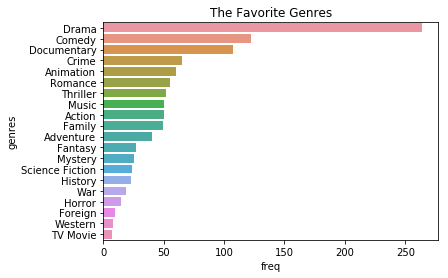

In [14]:
#可视化操作
sns.barplot(x="freq",y="genres",data=df_genres)
plt.title('The Favorite Genres')
plt.show()

##### 从图形可以看出Drama类型的电影，评分都很高

### 研究问题 2（各主要特征间的关联性。）

In [15]:
# 请继续探索数据，解决你额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
movies_data.sort_values(by='popularity',ascending=False)
movies_data_heap = movies_data.loc[:,['popularity','vote_average','revenue','revenue_adj','budget']]
movies_data_heap.head()

,popularity,vote_average,revenue,revenue_adj,budget
104,1.532997,6.2,49263404,4.532231e+07,30000000
105,1.510096,6.5,79799880,7.341586e+07,23000000
106,1.499614,6.2,14860766,1.367190e+07,15000000
107,1.495112,5.9,98450062,9.057402e+07,5000000
108,1.483246,6.3,99775678,9.179358e+07,53000000


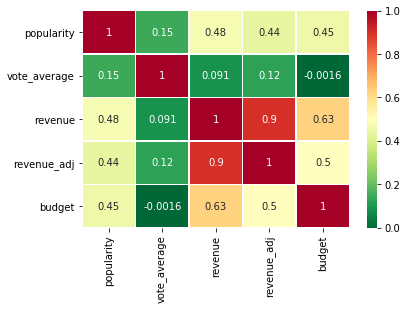

In [16]:
hitmapData = movies_data_heap.corr()
sns.heatmap(data=hitmapData,cmap='RdYlGn_r', linewidths=0.5, annot=True)
plt.show()

##### 从上述heatmap可以看出popularity和revenue、 budget具有中等的相关性，与vote_average没有太大相关性

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255